In [1]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output, Image
import pandas as pd
from itertools import product
import math

In [2]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")
css_styling()

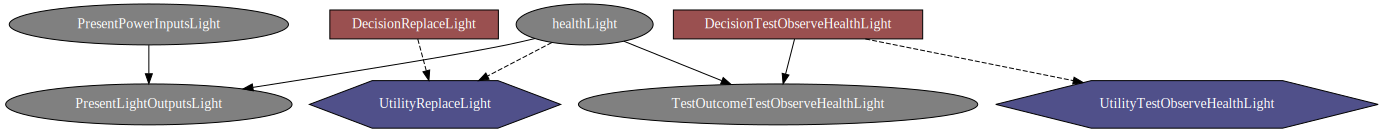

In [36]:
diagram = gum.InfluenceDiagram()
diagram.loadBIFXML('baselight.xml') # met voor 1 component de ID onderdelen voor vervangen en testen
gnb.showInfluenceDiagram(diagram, size=80)

In [37]:
diagram.erase("DecisionReplaceLight")
diagram.erase("UtilityReplaceLight")
diagram.erase("DecisionTestObserveHealthLight")
diagram.erase("TestOutcomeTestObserveHealthLight")
diagram.erase("UtilityTestObserveHealthLight")

In [38]:
diagram.addDecisionNode(gum.LabelizedVariable('DC', 'DC', ["T1", "Replace", "None"]))
diagram.addUtilityNode(gum.LabelizedVariable("US", "R(T1, R, DC)", 1))
diagram.addChanceNode(gum.LabelizedVariable('T1', 'T1', ["do", "dont"]))
diagram.addChanceNode(gum.LabelizedVariable('T1-Outcome', 'T1-Outcome', ["ok", "broken", "notdone"]))
diagram.addChanceNode(gum.LabelizedVariable('R', 'R', ["do", "dont"]))

7

In [40]:
diagram.addArc("healthLight", "T1")
diagram.addArc("healthLight", "R")
diagram.addArc("T1", "T1-Outcome")
diagram.addArc("T1-Outcome", "R")
diagram.addArc("T1", "US")
diagram.addArc("R", "US")
diagram.addArc("DC", "US")


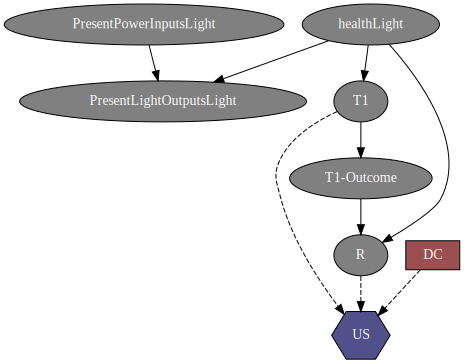

In [41]:
gnb.showInfluenceDiagram(diagram, size=80)

wat wil je modelleren?
- de zoektocht naar een oplossing waarom productie stil ligt
- er zijn meerdere testen mogelijk die indicaties leveren of een product vervangen moet worden 
  - onderscheid tussen testen door verschillende kosten
  - zijn er andere factoren te introduceren om testen te diferentieren?
- vervangen is aan de orde als health:broken * kosten de meeste waarde leveren
  - als geloof in health:broken groot genoeg dan is testen niet perse nodig
  - vervangen is de duurste stap, testen hebben hogere waarde door health:broken * lagere kosten
  - boete zetten op vervangen indien niet nodig maakt testen aantrekkelijker, hoe?
- de zoektocht stopt zodra gedrag systeem weer normaal is

hoe besluitvorming te modelleren?
- evidence invoeren en inference draaien, levert inzicht met welke besluiten totaal meeste utility is te bereiken
- totaal meeste utility is niet perse decentraal de hoogste waarden
- aflopen states test outcome node om te zien welke meeste EU oplevert:Joep aanpak
- algoritme kees?

andere opties
- EU uitrekenen in kleinere diagrammen zonder effect andere testen of vervangingsbesluiten?
- een uitgebreider "test" bayes net om noodzakelijke testen te filteren


  
hoe deze keuze te modelleren afhankelijk van de health
- health is de basis, bijvoorbeeld als health maar een klein beetje richting broken neigt dan is een test beter
- 

alternatief is om er een volgorde in aan te brengen maar als er een volgorde is dan kan dat ook anders gemodelleerd worden?

- health indicates belief component is broken, trigger is not normal behavior of component
- T1 models belief a test is necessary
  - if belief health:broken a test T1 should be done to confirm broken
  - if belief health:broken replace should triggered if belief T1:broken is firm
- R models belief a replacement is necessary
  - R should be triggered by T1 and R, the more belief in T1:broken the 
- US steers the utility on which a decision DC is based
- Decisions chooses between doing of T1 test and or Replace

In [34]:
diagram.cpt("T1")[0] = [0.1, 0.9]
diagram.cpt("T1"
           )[1] = [0.9, 0.1]
diagram.cpt("T1")

(pyAgrum.Potential<double>@0x3b39f0b0) 
      ||  T1               |
health||do       |dont     |
------||---------|---------|
ok    || 0.1000  | 0.9000  |
broken|| 0.9000  | 0.1000  |

In [35]:
diagram.cpt("R")[0] = [0.05]
diagram.cpt("R")

(pyAgrum.Potential<double>@0x3b3fb2e0) 
             ||  R                |
health|T1    ||do       |dont     |
------|------||---------|---------|
ok    |do    || 0.0000  | 0.0000  |
broken|do    || 0.0000  | 0.0000  |
ok    |dont  || 0.0000  | 0.0000  |
broken|dont  || 0.0000  | 0.0000  |

In [28]:
diagram.utility("US")

(pyAgrum.Potential<double>@0x3b437cc0) 
                    ||  US     |
T1    |R     |DC    ||0        |
------|------|------||---------|
do    |do    |T1    || 0.0000  |
dont  |do    |T1    || 0.0000  |
do    |dont  |T1    || 0.0000  |
dont  |dont  |T1    || 0.0000  |
do    |do    |Replac|| 0.0000  |
dont  |do    |Replac|| 0.0000  |
do    |dont  |Replac|| 0.0000  |
dont  |dont  |Replac|| 0.0000  |
do    |do    |None  || 0.0000  |
dont  |do    |None  || 0.0000  |
do    |dont  |None  || 0.0000  |
dont  |dont  |None  || 0.0000  |

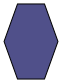

In [46]:
diag = gum.InfluenceDiagram()

In [47]:
#diag.addDecisionNode(gum.LabelizedVariable('DC', 'DC', ["T1", "Replace", "None"]))
#diag.addUtilityNode(gum.LabelizedVariable("US", "R(T1, R, DC)", 1))
#diag.addChanceNode(gum.LabelizedVariable('R', 'R', ["do", "dont"]))
diag.addChanceNode(gum.LabelizedVariable('T1', 'T1', ["do", "dont"]))
diag.addChanceNode(gum.LabelizedVariable('T1-Outcome', 'T1-Outcome', ["ok", "broken", "notdone"]))
diag.addArc("T1", "T1-Outcome")

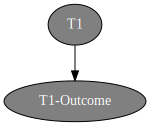

In [48]:
gnb.showInfluenceDiagram(diag)

In [54]:
diag.cpt("T1")[0] = 0.9
diag.cpt("T1")[1] = 0.1
diag.cpt("T1")

(pyAgrum.Potential<double>@0x3a42b110) 
  T1               |
do       |dont     |
---------|---------|
 0.9000  | 0.1000  |

In [66]:
diag.cpt("T1-Outcome")[0] = [0.9,0.999,0.001]
diag.cpt("T1-Outcome")[1] = [0.001,0.001,0.998]
diag.cpt("T1-Outcome")

(pyAgrum.Potential<double>@0x3b19b5a0) 
      ||  T1-Outcome                 |
T1    ||ok       |broken   |notdone  |
------||---------|---------|---------|
do    || 0.9000  | 0.9990  | 0.0010  |
dont  || 0.0010  | 0.0010  | 0.9980  |

In [67]:
gnb.showInference(diag, evs={
    "T1":0,
#    "T1-Outcome":1,
}, size=40)

FatalError: [pyAgrum] Fatal error: This LIMID/Influence Diagram is not solvable.